In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json, os, glob, re

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

from matplotlib import rc
rc("text", usetex=False)

from experiments_cifar10 import get_exp_results

import seaborn as sns
sns.set_style("whitegrid")

/tmp/ipykernel_102900/3444746311.py:9: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [


# CIFAR-10 experiment demo

In [2]:
# ***** Extract CIFAR-10 data features first before running the demo in this cell. Instructions for extracting 
# image features are in the ../README.md file ********************************************************************#

results_log = get_exp_results(alpha = 1.0, seed=0, lamda=10, extractor='resnet', transf_type='rotated',
               dataset='cifar10', eta=0.95)

print("Results on data with spurious correlations between image labels and style related features in the data:")
print("Baseline in-distribution accuracy: ",results_log['baseline_indist_accuracy_sp_corr'])
print("Baseline out-of-distribution accuracy: ",results_log['baseline_ood_accuracy_sp_corr'])
print()
print("PISCO in-distribution accuracy: ",results_log['PISCO_indist_accuracy_sp_corr'])
print("PISCO out-of-distribution accuracy: ",results_log['PISCO_ood_accuracy_sp_corr'])



/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Results on data with spurious correlations between image labels and style related features in the data:
Baseline in-distribution accuracy:  0.8952
Baseline out-of-distribution accuracy:  0.1079

PISCO in-distribution accuracy:  0.8368
PISCO out-of-distribution accuracy:  0.6547


In [3]:
path = './results/results_cifar10/'

list_dir = []

for file in glob.glob(path + '*.json'):
    with open(file) as f:
        data = json.load(f)
        list_dir.append(data)
        
df = pd.DataFrame(list_dir)
# print(df.columns)
# df

# Correlations Table

In [4]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['corr_special', 'corr_ns_f_norm', 'z_corr_ns_f_norm']

variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)

summary_lamda1 = summary[summary.lamda==1][summary.alpha==1]

# display(summary_lamda1)

# print(summary_lamda1.to_latex(escape=False, column_format='l' + 'c'*len(summary_lamda1.columns)))


/tmp/ipykernel_102900/1527058633.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_lamda1 = summary[summary.lamda==1][summary.alpha==1]


# Accuracy Results - Trained on original data, tested on transformed data - No spurious correlations in the data

In [5]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['baseline_ood_acc_no_sp_corr', 'PISCO_ood_acc_no_sp_corr']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)

summary_lamda1 = summary[summary.lamda==1][summary.alpha==1]

# display(summary_lamda1)

# print(summary_lamda1.to_latex(escape=False, column_format='l' + 'c'*len(summary_lamda1.columns)))

/tmp/ipykernel_102900/3204274902.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_lamda1 = summary[summary.lamda==1][summary.alpha==1]


In [6]:
# Generating table for latex for accuracies on data with no spurious correlations  
# ***************
baseline_ood_no_sp_corr_mean = summary_lamda1.baseline_ood_acc_no_sp_corr["mean"]
lamda1_PISCO_ood_no_sp_corr_mean = summary_lamda1.PISCO_ood_acc_no_sp_corr["mean"]
lamda10_PISCO_ood_no_sp_corr_mean = summary_lamda1.PISCO_ood_acc_no_sp_corr["mean"]
lamda50_PISCO_ood_no_sp_corr_mean = summary_lamda1.PISCO_ood_acc_no_sp_corr["mean"]

columns = ["Transformation"]
table1 = pd.DataFrame(list(summary_lamda1.transformation_type), columns=columns)
table1['Baseline (ResNet 18)'] = list(baseline_ood_no_sp_corr_mean)
# table1['Baseline (ResNet 18)'] = list(z_ood_no_sp_corr_mean.apply("{:.3f}".format)+ '$\pm$' + 
#                                      z_ood_no_sp_corr_std.apply("{:.3f}".format))
table1['PISCO,'+r' $\lambda = 1$'] = list(lamda1_PISCO_ood_no_sp_corr_mean)
table1['PISCO,'+r' $\lambda = 10$'] = list(lamda10_PISCO_ood_no_sp_corr_mean)
table1['PISCO,'+r' $\lambda = 50$'] = list(lamda50_PISCO_ood_no_sp_corr_mean)

# display(table1)

# print(table1.to_latex(escape=False, column_format='l' + 'c'*len(table1.columns)))



In [7]:
# In Dist Accuracies for data with not spurious correlations

keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['baseline_indist_acc_no_sp_corr', 'PISCO_indist_acc_no_sp_corr']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0][summary.alpha==1]
summary_lamda1 = summary[summary.lamda==1][summary.alpha==1]
summary_lamda10 = summary[summary.lamda==10][summary.alpha==1]
summary_lamda50 = summary[summary.lamda==50][summary.alpha==1]

# display(summary_lamda0)
# display(summary_lamda1)
# display(summary_lamda10)
# display(summary_lamda50)

/tmp/ipykernel_102900/387609386.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_lamda0 = summary[summary.lamda==0][summary.alpha==1]
/tmp/ipykernel_102900/387609386.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_lamda1 = summary[summary.lamda==1][summary.alpha==1]
/tmp/ipykernel_102900/387609386.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_lamda10 = summary[summary.lamda==10][summary.alpha==1]
/tmp/ipykernel_102900/387609386.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_lamda50 = summary[summary.lamda==50][summary.alpha==1]


# Plots - spurious correlations exp

In [8]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['baseline_ood_accuracy_sp_corr', 'PISCO_ood_accuracy_sp_corr']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0]
summary_lamda1 = summary[summary.lamda==1]
summary_lamda10 = summary[summary.lamda==10]
summary_lamda50 = summary[summary.lamda==50]

# display(summary_lamda0)
# display(summary_lamda1)
# display(summary_lamda10)
# display(summary_lamda50)


# Rotation

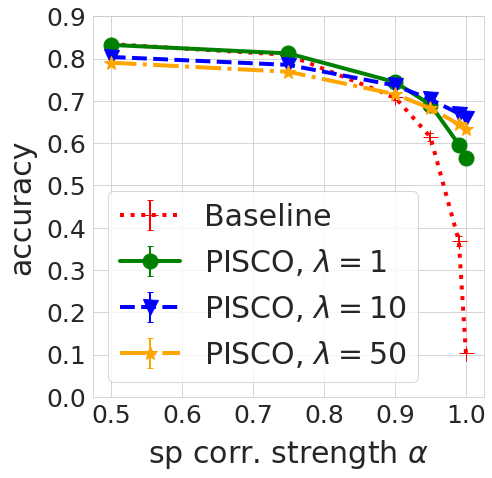

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

baseline_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="rotated"].baseline_ood_accuracy_sp_corr["mean"])
lamda1_PISCO_ood_accuracy_mean = list(summary_lamda1[summary_lamda1.transformation_type=="rotated"].PISCO_ood_accuracy_sp_corr["mean"])
lamda10_PISCO_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="rotated"].PISCO_ood_accuracy_sp_corr["mean"])
lamda50_PISCO_ood_accuracy_mean = list(summary_lamda50[summary_lamda50.transformation_type=="rotated"].PISCO_ood_accuracy_sp_corr["mean"])

baseline_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="rotated"].baseline_ood_accuracy_sp_corr["std"])
lamda1_PISCO_ood_accuracy_std = list(summary_lamda1[summary_lamda1.transformation_type=="rotated"].PISCO_ood_accuracy_sp_corr["std"])
lamda10_PISCO_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="rotated"].PISCO_ood_accuracy_sp_corr["std"])
lamda50_PISCO_ood_accuracy_std = list(summary_lamda50[summary_lamda50.transformation_type=="rotated"].PISCO_ood_accuracy_sp_corr["std"])

x= summary.alpha.unique()
y_means = np.array([baseline_ood_accuracy_mean, lamda1_PISCO_ood_accuracy_mean, lamda10_PISCO_ood_accuracy_mean,lamda50_PISCO_ood_accuracy_mean])
y_stds = np.array([baseline_ood_accuracy_std, lamda1_PISCO_ood_accuracy_std, lamda10_PISCO_ood_accuracy_std, lamda50_PISCO_ood_accuracy_std])

labels = ["Baseline", 'PISCO,'+r' $\lambda = 1$','PISCO,'+r' $\lambda = 10$', 'PISCO,'+r' $\lambda = 50$']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
linestyles = ['-', '--', '-.', ':']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['+','o', 'v', '*', 'x', 's','p']
style = {"linewidth":4, "markeredgewidth":1, "elinewidth":2, "capsize":3}

x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i],color=colors[i], label=labels[i], marker=markers[i],markersize=15, **style)
    plt.rcParams['lines.linestyle'] = linestyles[i]
plt.legend(loc='lower left', prop={'size': 30})

plt.xlabel(r'sp corr. strength $\alpha$', size=30, labelpad=10)
plt.ylabel(r'accuracy', size=30, labelpad=10)

plt.ylim(0, 0.9)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('./plots/rotat-ResNet.png', dpi=300, bbox_inches='tight')
plt.show()

# Contrast

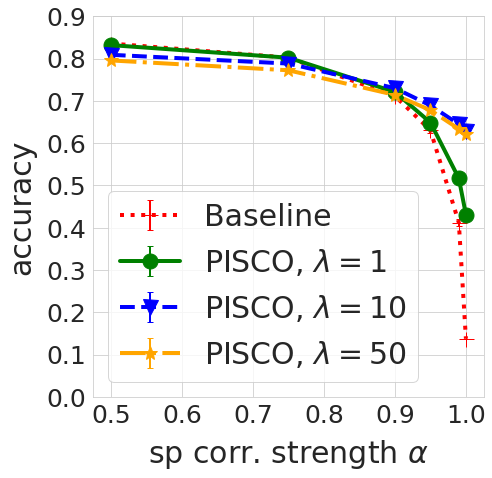

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

baseline_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="contrasted"].baseline_ood_accuracy_sp_corr["mean"])
lamda1_PISCO_ood_accuracy_mean = list(summary_lamda1[summary_lamda1.transformation_type=="contrasted"].PISCO_ood_accuracy_sp_corr["mean"])
lamda10_PISCO_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="contrasted"].PISCO_ood_accuracy_sp_corr["mean"])
lamda50_PISCO_ood_accuracy_mean = list(summary_lamda50[summary_lamda50.transformation_type=="contrasted"].PISCO_ood_accuracy_sp_corr["mean"])

baseline_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="contrasted"].baseline_ood_accuracy_sp_corr["std"])
lamda1_PISCO_ood_accuracy_std = list(summary_lamda1[summary_lamda1.transformation_type=="contrasted"].PISCO_ood_accuracy_sp_corr["std"])
lamda10_PISCO_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="contrasted"].PISCO_ood_accuracy_sp_corr["std"])
lamda50_PISCO_ood_accuracy_std = list(summary_lamda50[summary_lamda50.transformation_type=="contrasted"].PISCO_ood_accuracy_sp_corr["std"])

x= summary.alpha.unique()
y_means = np.array([baseline_ood_accuracy_mean, lamda1_PISCO_ood_accuracy_mean, lamda10_PISCO_ood_accuracy_mean,lamda50_PISCO_ood_accuracy_mean])
y_stds = np.array([baseline_ood_accuracy_std, lamda1_PISCO_ood_accuracy_std, lamda10_PISCO_ood_accuracy_std, lamda50_PISCO_ood_accuracy_std])

labels = ["Baseline", 'PISCO,'+r' $\lambda = 1$','PISCO,'+r' $\lambda = 10$', 'PISCO,'+r' $\lambda = 50$']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
linestyles = ['-', '--', '-.', ':']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['+','o', 'v', '*', 'x', 's','p']
style = {"linewidth":4, "markeredgewidth":1, "elinewidth":2, "capsize":3}

x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i],color=colors[i], label=labels[i], marker=markers[i],markersize=15, **style)
    plt.rcParams['lines.linestyle'] = linestyles[i]
plt.legend(loc='lower left', prop={'size': 30})

plt.xlabel(r'sp corr. strength $\alpha$', size=30, labelpad=10)
plt.ylabel(r'accuracy', size=30, labelpad=10)

plt.ylim(0, 0.9)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('./plots/contr-ResNet.png', dpi=300, bbox_inches='tight')
plt.show()

# Blur

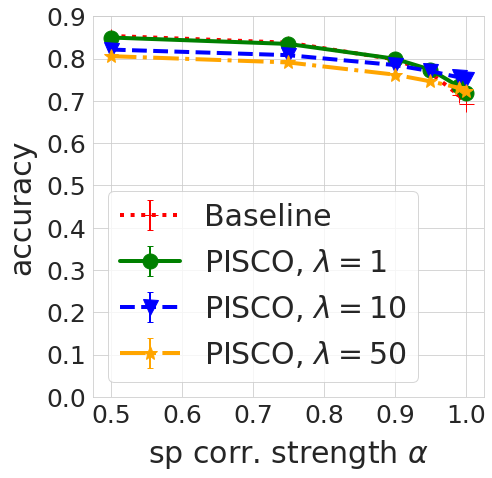

In [11]:
baseline_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="blurred"].baseline_ood_accuracy_sp_corr["mean"])
lamda1_PISCO_ood_accuracy_mean = list(summary_lamda1[summary_lamda1.transformation_type=="blurred"].PISCO_ood_accuracy_sp_corr["mean"])
lamda10_PISCO_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="blurred"].PISCO_ood_accuracy_sp_corr["mean"])
lamda50_PISCO_ood_accuracy_mean = list(summary_lamda50[summary_lamda50.transformation_type=="blurred"].PISCO_ood_accuracy_sp_corr["mean"])

baseline_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="blurred"].baseline_ood_accuracy_sp_corr["std"])
lamda1_PISCO_ood_accuracy_std = list(summary_lamda1[summary_lamda1.transformation_type=="blurred"].PISCO_ood_accuracy_sp_corr["std"])
lamda10_PISCO_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="blurred"].PISCO_ood_accuracy_sp_corr["std"])
lamda50_PISCO_ood_accuracy_std = list(summary_lamda50[summary_lamda50.transformation_type=="blurred"].PISCO_ood_accuracy_sp_corr["std"])

x= summary.alpha.unique()
y_means = np.array([baseline_ood_accuracy_mean, lamda1_PISCO_ood_accuracy_mean, lamda10_PISCO_ood_accuracy_mean,lamda50_PISCO_ood_accuracy_mean])
y_stds = np.array([baseline_ood_accuracy_std, lamda1_PISCO_ood_accuracy_std, lamda10_PISCO_ood_accuracy_std, lamda50_PISCO_ood_accuracy_std])

labels = ["Baseline", 'PISCO,'+r' $\lambda = 1$','PISCO,'+r' $\lambda = 10$', 'PISCO,'+r' $\lambda = 50$']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
linestyles = ['-', '--', '-.', ':']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['+','o', 'v', '*', 'x', 's','p']
style = {"linewidth":4, "markeredgewidth":1, "elinewidth":2, "capsize":3}

x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i],color=colors[i], label=labels[i], marker=markers[i],markersize=15, **style)
    plt.rcParams['lines.linestyle'] = linestyles[i]
plt.legend(loc='lower left', prop={'size': 30})

plt.xlabel(r'sp corr. strength $\alpha$', size=30, labelpad=10)
plt.ylabel(r'accuracy', size=30, labelpad=10)

plt.ylim(0, 0.9)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('./plots/blur-ResNet.png', dpi=300, bbox_inches='tight')
plt.show()

# Saturation

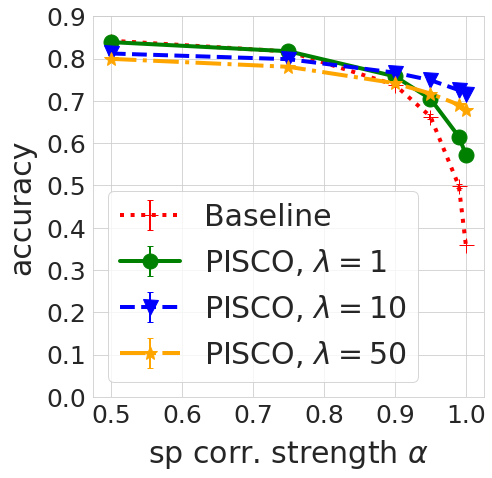

In [12]:
baseline_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="saturated"].baseline_ood_accuracy_sp_corr["mean"])
lamda1_PISCO_ood_accuracy_mean = list(summary_lamda1[summary_lamda1.transformation_type=="saturated"].PISCO_ood_accuracy_sp_corr["mean"])
lamda10_PISCO_ood_accuracy_mean = list(summary_lamda10[summary_lamda10.transformation_type=="saturated"].PISCO_ood_accuracy_sp_corr["mean"])
lamda50_PISCO_ood_accuracy_mean = list(summary_lamda50[summary_lamda50.transformation_type=="saturated"].PISCO_ood_accuracy_sp_corr["mean"])

baseline_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="saturated"].baseline_ood_accuracy_sp_corr["std"])
lamda1_PISCO_ood_accuracy_std = list(summary_lamda1[summary_lamda1.transformation_type=="saturated"].PISCO_ood_accuracy_sp_corr["std"])
lamda10_PISCO_ood_accuracy_std = list(summary_lamda10[summary_lamda10.transformation_type=="saturated"].PISCO_ood_accuracy_sp_corr["std"])
lamda50_PISCO_ood_accuracy_std = list(summary_lamda50[summary_lamda50.transformation_type=="saturated"].PISCO_ood_accuracy_sp_corr["std"])

x= summary.alpha.unique()
y_means = np.array([baseline_ood_accuracy_mean, lamda1_PISCO_ood_accuracy_mean, lamda10_PISCO_ood_accuracy_mean,lamda50_PISCO_ood_accuracy_mean])
y_stds = np.array([baseline_ood_accuracy_std, lamda1_PISCO_ood_accuracy_std, lamda10_PISCO_ood_accuracy_std, lamda50_PISCO_ood_accuracy_std])

labels = ["Baseline", 'PISCO,'+r' $\lambda = 1$','PISCO,'+r' $\lambda = 10$', 'PISCO,'+r' $\lambda = 50$']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
linestyles = ['-', '--', '-.', ':']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['+','o', 'v', '*', 'x', 's','p']
style = {"linewidth":4, "markeredgewidth":1, "elinewidth":2, "capsize":3}

x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i],color=colors[i], label=labels[i], marker=markers[i],markersize=15, **style)
    plt.rcParams['lines.linestyle'] = linestyles[i]
plt.legend(loc='lower left', prop={'size': 30})

plt.xlabel(r'sp corr. strength $\alpha$', size=30, labelpad=10)
plt.ylabel(r'accuracy', size=30, labelpad=10)

plt.ylim(0, 0.9)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('./plots/sat-ResNet.png', dpi=300, bbox_inches='tight')
plt.show()